In [1]:
# Mercy codes starts here
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import glob
import matplotlib.patches as mpatches
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [2]:
#Reading the files, combining data
path = r'./Resources/' # use your path

all_files = glob.glob(path + "/*_Quality_*.csv")

all_files
li = []

for filename in all_files:

     df = pd.read_csv(filename, index_col=None, header=0)

     li.append(df)

QOL_df = pd.concat(li, axis=0, ignore_index=True)

suicide_rates_df = pd.read_csv(path + "suicide-death-rates-by-sex.csv")

suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})

combined_QOF_df = pd.merge(suicide_rates_df, QOL_df, how='inner', on=['Country', 'Year'])

combined_QOF_df

,Country,Code,Year,"Female (deaths per 100,000)","Male (deaths per 100,000)","Both sexes (deaths per 100,000)",Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Argentina,ARG,2013,4.14,18.70,11.074010,45,72.53,51.09,40.71,78.26,69.68,10.19,46.71,55.56,-
1,Argentina,ARG,2014,4.07,18.25,10.820289,41,81.12,57.08,42.52,76.75,66.85,8.95,45.00,57.45,-
2,Argentina,ARG,2015,4.01,17.82,10.570321,52,77.01,59.38,37.60,75.18,67.12,11.59,41.39,55.88,-
3,Argentina,ARG,2016,4.00,17.95,10.627446,36,138.48,74.92,36.72,73.73,64.09,12.22,42.36,58.46,91.7
4,Armenia,ARM,2015,3.42,14.56,8.522066,60,49.07,27.74,70.86,48.33,40.68,13.39,26.09,73.03,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Uruguay,URY,2015,6.88,28.87,17.119112,42,93.06,44.87,52.83,67.92,68.55,11.23,45.00,31.72,-
265,Venezuela,VEN,2013,2.09,14.94,8.394513,67,-48.27,18.71,14.30,44.44,110.55,20.78,38.75,81.89,-
266,Venezuela,VEN,2014,2.09,15.06,8.445635,68,-39.32,17.87,18.50,41.05,114.36,20.19,38.75,73.96,-
267,Venezuela,VEN,2015,2.07,15.24,8.524199,86,-53.04,11.90,15.93,38.52,111.01,22.23,30.60,79.19,-


In [3]:
#QUALITY OF LIFE RANKING
#Rank 2013 by quality of life
QOL_rank_2013_df=combined_QOF_df[combined_QOF_df['Year']==2013][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2013_df[['QOF_rank']]=QOL_rank_2013_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2013_1_df=QOL_rank_2013_df.loc[QOL_rank_2013_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2013_2_df=QOL_rank_2013_df.loc[(QOL_rank_2013_df['QOF_rank']>=21) & (QOL_rank_2013_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2013_3_df=QOL_rank_2013_df.loc[(QOL_rank_2013_df['QOF_rank']>=41) & (QOL_rank_2013_df['QOF_rank']<=60)].sort_values('QOF_rank')# #2013 QOL

Median_Suicide_rate_2013_1=QOL_rank_2013_1_df.groupby('Year').median()
Median_Suicide_rate_2013_1['Group1']=['1']
Median_Suicide_rate_2013_2=QOL_rank_2013_2_df.groupby('Year').median()
Median_Suicide_rate_2013_2['Group2']=['2']
Median_Suicide_rate_2013_3=QOL_rank_2013_3_df.groupby('Year').median()
Median_Suicide_rate_2013_3['Group3']=['3']
Median_Suicide_rate_2013_3


# #Rank 2014 by quality of life
QOL_rank_2014_df=combined_QOF_df.loc[combined_QOF_df['Year']==2014][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2014_df[['QOF_rank']]=QOL_rank_2014_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2014_1_df=QOL_rank_2014_df.loc[QOL_rank_2014_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2014_2_df=QOL_rank_2014_df.loc[(QOL_rank_2014_df['QOF_rank']>=21) & (QOL_rank_2014_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2014_3_df=QOL_rank_2014_df.loc[(QOL_rank_2014_df['QOF_rank']>=41) & (QOL_rank_2014_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2014_1=QOL_rank_2014_1_df.groupby('Year').median()
Median_Suicide_rate_2014_1['Group1']=['1']
Median_Suicide_rate_2014_2=QOL_rank_2014_2_df.groupby('Year').median()
Median_Suicide_rate_2014_2['Group2']=['2']
Median_Suicide_rate_2014_3=QOL_rank_2014_3_df.groupby('Year').median()
Median_Suicide_rate_2014_3['Group3']=['3']
Median_Suicide_rate_2014_3

# # #Rank 2015 by quality of life
QOL_rank_2015_df=combined_QOF_df.loc[combined_QOF_df['Year']==2015][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2015_df[['QOF_rank']]=QOL_rank_2015_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2015_1_df=QOL_rank_2015_df.loc[QOL_rank_2015_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2015_2_df=QOL_rank_2015_df.loc[(QOL_rank_2015_df['QOF_rank']>=21) & (QOL_rank_2015_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2015_3_df=QOL_rank_2015_df.loc[(QOL_rank_2015_df['QOF_rank']>=41) & (QOL_rank_2015_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2015_1=QOL_rank_2015_1_df.groupby('Year').median()
Median_Suicide_rate_2015_1['Group1']=['1']
Median_Suicide_rate_2015_2=QOL_rank_2015_2_df.groupby('Year').median()
Median_Suicide_rate_2015_2['Group2']=['2']
Median_Suicide_rate_2015_3=QOL_rank_2015_3_df.groupby('Year').median()
Median_Suicide_rate_2015_3['Group3']=['3']
Median_Suicide_rate_2015_3


# # #Rank 2016 by quality of life
QOL_rank_2016_df=combined_QOF_df.loc[combined_QOF_df['Year']==2016][['Country','Year','Quality of Life Index','Both sexes (deaths per 100,000)']]
QOL_rank_2016_df[['QOF_rank']]=QOL_rank_2016_df[['Quality of Life Index']].rank(ascending=False)
QOL_rank_2016_1_df=QOL_rank_2016_df.loc[QOL_rank_2016_df['QOF_rank']<=20].sort_values('QOF_rank')
QOL_rank_2016_2_df=QOL_rank_2016_df.loc[(QOL_rank_2016_df['QOF_rank']>=21) & (QOL_rank_2016_df['QOF_rank']<=40)].sort_values('QOF_rank')
QOL_rank_2016_3_df=QOL_rank_2016_df.loc[(QOL_rank_2016_df['QOF_rank']>=41) & (QOL_rank_2016_df['QOF_rank']<=60)].sort_values('QOF_rank')

Median_Suicide_rate_2016_1=QOL_rank_2016_1_df.groupby('Year').median()
Median_Suicide_rate_2016_1['Group1']=['1']
Median_Suicide_rate_2016_2=QOL_rank_2016_2_df.groupby('Year').median()
Median_Suicide_rate_2016_2['Group2']=['2']
Median_Suicide_rate_2016_3=QOL_rank_2016_3_df.groupby('Year').median()
Median_Suicide_rate_2016_3['Group3']=['3']
Median_Suicide_rate_2016_3

QOF_combined_df=pd.concat((Median_Suicide_rate_2013_1,Median_Suicide_rate_2013_2,Median_Suicide_rate_2013_3,
                   Median_Suicide_rate_2014_1,Median_Suicide_rate_2014_2,Median_Suicide_rate_2014_3,
                  Median_Suicide_rate_2015_1,Median_Suicide_rate_2015_2,Median_Suicide_rate_2015_3,
                  Median_Suicide_rate_2016_1,Median_Suicide_rate_2016_2,Median_Suicide_rate_2016_3), axis=0)
QOF_combined_df=QOF_combined_df.fillna(0)
QOF_combined_df




,"Both sexes (deaths per 100,000)",Group1,Group2,Group3,QOF_rank,Quality of Life Index
Year,,,,,,
2013,10.803423,1,0,0,10.5,167.300
2013,10.753163,0,2,0,30.5,114.315
2013,9.308304,0,0,3,50.5,50.960
2014,10.603629,1,0,0,10.5,170.190
2014,11.131877,0,2,0,30.5,110.175
2014,9.405625,0,0,3,50.5,49.445
2015,9.512322,1,0,0,10.5,175.300
2015,10.972554,0,2,0,30.5,120.230
2015,9.657366,0,0,3,50.5,77.805


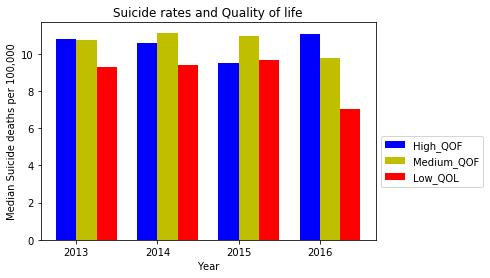

<Figure size 576x288 with 0 Axes>

In [4]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, QOF_combined_df[QOF_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, QOF_combined_df[QOF_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , QOF_combined_df[QOF_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide rates and Quality of life')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')


ax.legend((p1[0], p2[0],p3[0]), ('High_QOF', 'Medium_QOF','Low_QOL'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))

ax.autoscale_view()
plt.style.use('fivethirtyeight')
plt.show()


In [5]:
#Conclusion
#Countries with low quality of life have low suicide rates


In [6]:
# Mercy codes ends here

In [7]:
# Mercy's Null Hypothesis Start

In [21]:
# Take Mean for Each group
QOF_combined_df_Grp1 = QOF_combined_df[QOF_combined_df['Group1']=='1'][['Both sexes (deaths per 100,000)']]
QOF_combined_df_Grp2 = QOF_combined_df[QOF_combined_df['Group2']=='2'][['Both sexes (deaths per 100,000)']]
QOF_combined_df_Grp3 = QOF_combined_df[QOF_combined_df['Group3']=='3'][['Both sexes (deaths per 100,000)']]

sts.f_oneway(QOF_combined_df_Grp1["Both sexes (deaths per 100,000)"], QOF_combined_df_Grp2["Both sexes (deaths per 100,000)"], QOF_combined_df_Grp3["Both sexes (deaths per 100,000)"])

# Calcuate the means for display

F_onewayResult(statistic=5.1505217642292935, pvalue=0.03228328623342806)

In [ ]:
# Mercy's Null Hypothesis End

In [32]:
### Ash's Code Start here
#pollution Ranking
#Rank 2013 by quality of life
POL_rank_2013_df=combined_QOF_df[combined_QOF_df['Year']==2013][['Country','Year','Pollution Index','Both sexes (deaths per 100,000)']]
POL_rank_2013_df[['QOF_rank']]=POL_rank_2013_df[['Pollution Index']].rank(ascending=False)
POL_rank_2013_1_df=POL_rank_2013_df.loc[POL_rank_2013_df['QOF_rank']<=20].sort_values('QOF_rank')
POL_rank_2013_2_df=POL_rank_2013_df.loc[(POL_rank_2013_df['QOF_rank']>=21) & (POL_rank_2013_df['QOF_rank']<=40)].sort_values('QOF_rank')
POL_rank_2013_3_df=POL_rank_2013_df.loc[(POL_rank_2013_df['QOF_rank']>=41) & (POL_rank_2013_df['QOF_rank']<=60)].sort_values('QOF_rank')# #2013 POL

POL_Median_Suicide_rate_2013_1=POL_rank_2013_1_df.groupby('Year').median()
POL_Median_Suicide_rate_2013_1['Group1']=['1']
POL_Median_Suicide_rate_2013_2=POL_rank_2013_2_df.groupby('Year').median()
POL_Median_Suicide_rate_2013_2['Group2']=['2']
POL_Median_Suicide_rate_2013_3=POL_rank_2013_3_df.groupby('Year').median()
POL_Median_Suicide_rate_2013_3['Group3']=['3']
POL_Median_Suicide_rate_2013_3


# #Rank 2014 by quality of life
POL_rank_2014_df=combined_QOF_df.loc[combined_QOF_df['Year']==2014][['Country','Year','Pollution Index','Both sexes (deaths per 100,000)']]
POL_rank_2014_df[['QOF_rank']]=POL_rank_2014_df[['Pollution Index']].rank(ascending=False)
POL_rank_2014_1_df=POL_rank_2014_df.loc[POL_rank_2014_df['QOF_rank']<=20].sort_values('QOF_rank')
POL_rank_2014_2_df=POL_rank_2014_df.loc[(POL_rank_2014_df['QOF_rank']>=21) & (POL_rank_2014_df['QOF_rank']<=40)].sort_values('QOF_rank')
POL_rank_2014_3_df=POL_rank_2014_df.loc[(POL_rank_2014_df['QOF_rank']>=41) & (POL_rank_2014_df['QOF_rank']<=60)].sort_values('QOF_rank')

POL_Median_Suicide_rate_2014_1=POL_rank_2014_1_df.groupby('Year').median()
POL_Median_Suicide_rate_2014_1['Group1']=['1']
POL_Median_Suicide_rate_2014_2=POL_rank_2014_2_df.groupby('Year').median()
POL_Median_Suicide_rate_2014_2['Group2']=['2']
POL_Median_Suicide_rate_2014_3=POL_rank_2014_3_df.groupby('Year').median()
POL_Median_Suicide_rate_2014_3['Group3']=['3']
POL_Median_Suicide_rate_2014_3

# # #Rank 2015 by quality of life
POL_rank_2015_df=combined_QOF_df.loc[combined_QOF_df['Year']==2015][['Country','Year','Pollution Index','Both sexes (deaths per 100,000)']]
POL_rank_2015_df[['QOF_rank']]=POL_rank_2015_df[['Pollution Index']].rank(ascending=False)
POL_rank_2015_1_df=POL_rank_2015_df.loc[POL_rank_2015_df['QOF_rank']<=20].sort_values('QOF_rank')
POL_rank_2015_2_df=POL_rank_2015_df.loc[(POL_rank_2015_df['QOF_rank']>=21) & (POL_rank_2015_df['QOF_rank']<=40)].sort_values('QOF_rank')
POL_rank_2015_3_df=POL_rank_2015_df.loc[(POL_rank_2015_df['QOF_rank']>=41) & (POL_rank_2015_df['QOF_rank']<=60)].sort_values('QOF_rank')

POL_Median_Suicide_rate_2015_1=POL_rank_2015_1_df.groupby('Year').median()
POL_Median_Suicide_rate_2015_1['Group1']=['1']
POL_Median_Suicide_rate_2015_2=POL_rank_2015_2_df.groupby('Year').median()
POL_Median_Suicide_rate_2015_2['Group2']=['2']
POL_Median_Suicide_rate_2015_3=POL_rank_2015_3_df.groupby('Year').median()
POL_Median_Suicide_rate_2015_3['Group3']=['3']
POL_Median_Suicide_rate_2015_3


# # #Rank 2016 by quality of life
POL_rank_2016_df=combined_QOF_df.loc[combined_QOF_df['Year']==2016][['Country','Year','Pollution Index','Both sexes (deaths per 100,000)']]
POL_rank_2016_df[['QOF_rank']]=POL_rank_2016_df[['Pollution Index']].rank(ascending=False)
POL_rank_2016_1_df=POL_rank_2016_df.loc[POL_rank_2016_df['QOF_rank']<=20].sort_values('QOF_rank')
POL_rank_2016_2_df=POL_rank_2016_df.loc[(POL_rank_2016_df['QOF_rank']>=21) & (POL_rank_2016_df['QOF_rank']<=40)].sort_values('QOF_rank')
POL_rank_2016_3_df=POL_rank_2016_df.loc[(POL_rank_2016_df['QOF_rank']>=41) & (POL_rank_2016_df['QOF_rank']<=60)].sort_values('QOF_rank')

POL_Median_Suicide_rate_2016_1=POL_rank_2016_1_df.groupby('Year').median()
POL_Median_Suicide_rate_2016_1['Group1']=['1']
POL_Median_Suicide_rate_2016_2=POL_rank_2016_2_df.groupby('Year').median()
POL_Median_Suicide_rate_2016_2['Group2']=['2']
POL_Median_Suicide_rate_2016_3=POL_rank_2016_3_df.groupby('Year').median()
POL_Median_Suicide_rate_2016_3['Group3']=['3']
POL_Median_Suicide_rate_2016_3

POL_combined_df=pd.concat((POL_Median_Suicide_rate_2013_1,POL_Median_Suicide_rate_2013_2,POL_Median_Suicide_rate_2013_3,
                   POL_Median_Suicide_rate_2014_1,POL_Median_Suicide_rate_2014_2,POL_Median_Suicide_rate_2014_3,
                  POL_Median_Suicide_rate_2015_1,POL_Median_Suicide_rate_2015_2,POL_Median_Suicide_rate_2015_3,
                  POL_Median_Suicide_rate_2016_1,POL_Median_Suicide_rate_2016_2,POL_Median_Suicide_rate_2016_3), axis=0)
POL_combined_df=POL_combined_df.fillna(0)
POL_combined_df


,"Both sexes (deaths per 100,000)",Group1,Group2,Group3,Pollution Index,QOF_rank
Year,,,,,,
2013,6.778185,1,0,0,81.220,10.5
2013,7.670103,0,2,0,58.460,30.5
2013,10.803423,0,0,3,31.495,50.5
2014,6.706737,1,0,0,74.620,10.5
2014,9.405625,0,2,0,57.515,30.5
2014,10.280819,0,0,3,32.685,50.5
2015,5.925866,1,0,0,84.035,10.5
2015,9.053586,0,2,0,66.685,30.5
2015,10.483529,0,0,3,50.550,50.5


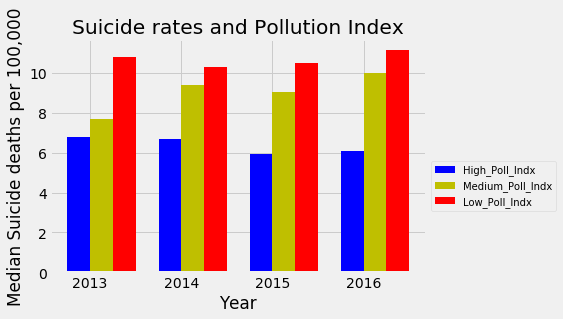

<Figure size 576x288 with 0 Axes>

In [33]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, POL_combined_df[POL_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, POL_combined_df[POL_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , POL_combined_df[POL_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide rates and Pollution Index')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')
plt.style.use('fivethirtyeight')
ax.legend((p1[0], p2[0],p3[0]), ('High_Poll_Indx', 'Medium_Poll_Indx','Low_Poll_Indx'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
#Ash ends here
#ASh Stats Start
POL_combined_df_Grp1 = POL_combined_df[POL_combined_df['Group1']=='1'][['Both sexes (deaths per 100,000)']]
POL_combined_df_Grp2 = POL_combined_df[POL_combined_df['Group2']=='2'][['Both sexes (deaths per 100,000)']]
POL_combined_df_Grp3 = POL_combined_df[POL_combined_df['Group3']=='3'][['Both sexes (deaths per 100,000)']]

sts.f_oneway(POL_combined_df_Grp1["Both sexes (deaths per 100,000)"], POL_combined_df_Grp2["Both sexes (deaths per 100,000)"], POL_combined_df_Grp3["Both sexes (deaths per 100,000)"])
#ASh Stats End

F_onewayResult(statistic=43.30858385436362, pvalue=2.4081295885249524e-05)

In [ ]:
# Onome codes starts here

In [23]:
# Cost of Living to Suicide rates
all_countries = combined_QOF_df[['Country','Year','Both sexes (deaths per 100,000)','Cost of Living Index']]
all_countries_2013 = all_countries.loc[all_countries['Year'] == 2013]
all_countries_2013[['Cost_of_Living_rank']]=all_countries_2013[['Cost of Living Index']].rank(ascending=False)
all_countries_2013_grp1 = all_countries_2013.loc[all_countries_2013['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2013_grp2 = all_countries_2013[(all_countries_2013['Cost_of_Living_rank']>=21) & (all_countries_2013['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2013_grp3 = all_countries_2013.loc[(all_countries_2013['Cost_of_Living_rank']>=41) & (all_countries_2013['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2013_grp1_median = all_countries_2013_grp1.groupby('Year').median()
suicide_rate_2013_grp1_median['Group1']=['1']
suicide_rate_2013_grp2_median=all_countries_2013_grp2.groupby('Year').median()
suicide_rate_2013_grp2_median['Group2']=['2']
suicide_rate_2013_grp3_median=all_countries_2013_grp3.groupby('Year').median()
suicide_rate_2013_grp3_median['Group3']=['3']
suicide_rate_2013_grp3_median


all_countries_2014 = all_countries.loc[all_countries['Year'] == 2014]
all_countries_2014[['Cost_of_Living_rank']]=all_countries_2014[['Cost of Living Index']].rank(ascending=False)
all_countries_2014_grp1 = all_countries_2014.loc[all_countries_2014['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2014_grp2 = all_countries_2014[(all_countries_2014['Cost_of_Living_rank']>=21) & (all_countries_2014['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2014_grp3 = all_countries_2014.loc[(all_countries_2014['Cost_of_Living_rank']>=41) & (all_countries_2014['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 

suicide_rate_2014_grp1_median = all_countries_2014_grp1.groupby('Year').median()
suicide_rate_2014_grp1_median['Group1']=['1']
suicide_rate_2014_grp2_median=all_countries_2014_grp2.groupby('Year').median()
suicide_rate_2014_grp2_median['Group2']=['2']
suicide_rate_2014_grp3_median=all_countries_2014_grp3.groupby('Year').median()
suicide_rate_2014_grp3_median['Group3']=['3']
suicide_rate_2014_grp3_median


all_countries_2015 = all_countries.loc[all_countries['Year'] == 2015]
all_countries_2015[['Cost_of_Living_rank']]=all_countries_2015[['Cost of Living Index']].rank(ascending=False)
all_countries_2015_grp1 = all_countries_2015.loc[all_countries_2015['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2015_grp2 = all_countries_2015[(all_countries_2015['Cost_of_Living_rank']>=21) & (all_countries_2015['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2015_grp3 = all_countries_2015.loc[(all_countries_2015['Cost_of_Living_rank']>=41) & (all_countries_2015['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2015_grp1_median = all_countries_2015_grp1.groupby('Year').median()
suicide_rate_2015_grp1_median['Group1']=['1']
suicide_rate_2015_grp2_median=all_countries_2015_grp2.groupby('Year').median()
suicide_rate_2015_grp2_median['Group2']=['2']
suicide_rate_2015_grp3_median=all_countries_2015_grp3.groupby('Year').median()
suicide_rate_2015_grp3_median['Group3']=['3']
suicide_rate_2015_grp3_median


all_countries_2016 = all_countries.loc[all_countries['Year'] == 2016]
all_countries_2016[['Cost_of_Living_rank']]=all_countries_2016[['Cost of Living Index']].rank(ascending=False)
all_countries_2016_grp1 = all_countries_2016.loc[all_countries_2016['Cost_of_Living_rank']<=20].sort_values('Cost_of_Living_rank')
all_countries_2016_grp2 = all_countries_2016[(all_countries_2016['Cost_of_Living_rank']>=21) & (all_countries_2016['Cost_of_Living_rank']<=40)].sort_values('Cost_of_Living_rank')
all_countries_2016_grp3 = all_countries_2016.loc[(all_countries_2016['Cost_of_Living_rank']>=41) & (all_countries_2016['Cost_of_Living_rank']<=60)].sort_values('Cost_of_Living_rank') 


suicide_rate_2016_grp1_median = all_countries_2016_grp1.groupby('Year').median()
suicide_rate_2016_grp1_median['Group1']=['1']
suicide_rate_2016_grp2_median=all_countries_2016_grp2.groupby('Year').median()
suicide_rate_2016_grp2_median['Group2']=['2']
suicide_rate_2016_grp3_median=all_countries_2016_grp3.groupby('Year').median()
suicide_rate_2016_grp3_median['Group3']=['3']
suicide_rate_2016_grp3_median

PP_combined_df=pd.concat((suicide_rate_2013_grp1_median,suicide_rate_2013_grp2_median,suicide_rate_2013_grp3_median,
                   suicide_rate_2014_grp1_median,suicide_rate_2014_grp2_median,suicide_rate_2014_grp3_median,
                  suicide_rate_2015_grp1_median,suicide_rate_2015_grp2_median,suicide_rate_2015_grp3_median,
                  suicide_rate_2016_grp1_median,suicide_rate_2016_grp2_median,suicide_rate_2016_grp3_median), axis=0)
PP_combined_df=PP_combined_df.fillna(0)
PP_combined_df

/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,"Both sexes (deaths per 100,000)",Cost of Living Index,Cost_of_Living_rank,Group1,Group2,Group3
Year,,,,,,
2013,10.319870,103.575,10.5,1,0,0
2013,10.299735,72.860,30.5,0,2,0
2013,9.308304,53.720,50.5,0,0,3
2014,10.603629,100.160,10.5,1,0,0
2014,8.971284,69.170,30.5,0,2,0
2014,10.451128,50.360,50.5,0,0,3
2015,9.644410,90.885,10.5,1,0,0
2015,8.735091,67.140,30.5,0,2,0
2015,10.070996,51.940,50.5,0,0,3


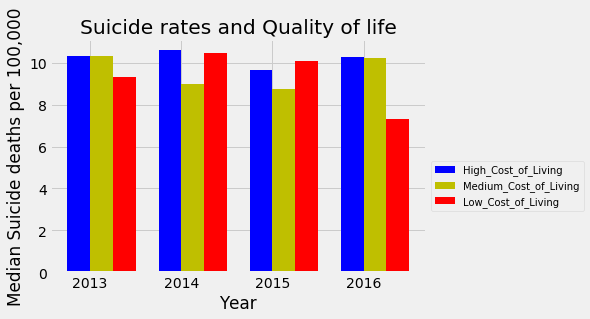

<Figure size 576x288 with 0 Axes>

In [24]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, PP_combined_df[PP_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, PP_combined_df[PP_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , PP_combined_df[PP_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide rates and Quality of life')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')


ax.legend((p1[0], p2[0],p3[0]), ('High_Cost_of_Living', 'Medium_Cost_of_Living','Low_Cost_of_Living'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))
plt.style.use('fivethirtyeight')
ax.autoscale_view()

plt.show()

In [26]:
#Onome's Stats Start
# Take Mean for Each group

PP_combined_df_Grp1 = PP_combined_df[PP_combined_df['Group1']=='1'][['Both sexes (deaths per 100,000)']]
PP_combined_df_Grp2 = PP_combined_df[PP_combined_df['Group2']=='2'][['Both sexes (deaths per 100,000)']]
PP_combined_df_Grp3 = PP_combined_df[PP_combined_df['Group3']=='3'][['Both sexes (deaths per 100,000)']]

sts.f_oneway(PP_combined_df_Grp1["Both sexes (deaths per 100,000)"], PP_combined_df_Grp2["Both sexes (deaths per 100,000)"], PP_combined_df_Grp3["Both sexes (deaths per 100,000)"])

#Onome's Stats End

F_onewayResult(statistic=0.9635005795028584, pvalue=0.4176734228188607)

In [ ]:
#Suicides Deaths gender analysis
combined_gender_df=combined_QOF_df[['Year','Female (deaths per 100,000)','Male (deaths per 100,000)']]
combined_gender_female_df=combined_gender_df.groupby('Year')[['Female (deaths per 100,000)']].sum()
combined_gender_male_df=combined_gender_df.groupby('Year')[['Male (deaths per 100,000)']].sum()

years=[2013,2014,2015,2016]
plt.plot( years, combined_gender_female_df, marker='o',  markerfacecolor='blue', markersize=12, color='blue', linewidth=4,linestyle='dashed', label="Female")
plt.plot( years, combined_gender_male_df, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4,linestyle='dashed', label="Male")
#fig, ax = plt.subplots()
#plt.figure(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.suptitle("Suicide Deaths by Gender by Year")
plt.legend(fontsize = 10,  bbox_to_anchor=(1.25, 0.5))
plt.xlabel("Year")
plt.ylabel("Aggregate Suicide deaths per 100,000")
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
# Onome codes ends here

In [ ]:
# Stacey starts here
# New Health care Ranking

In [28]:
#Health care RANKING
#Rank 2013 by Health Care Index
HCI_rank_2013_df=combined_QOF_df[combined_QOF_df['Year']==2013][['Country','Year','Health Care Index','Both sexes (deaths per 100,000)']]
HCI_rank_2013_df[['QOF_rank']]=HCI_rank_2013_df[['Health Care Index']].rank(ascending=False)
HCI_rank_2013_1_df=HCI_rank_2013_df.loc[HCI_rank_2013_df['QOF_rank']<=20].sort_values('QOF_rank')
HCI_rank_2013_2_df=HCI_rank_2013_df.loc[(HCI_rank_2013_df['QOF_rank']>=21) & (HCI_rank_2013_df['QOF_rank']<=40)].sort_values('QOF_rank')
HCI_rank_2013_3_df=HCI_rank_2013_df.loc[(HCI_rank_2013_df['QOF_rank']>=41) & (HCI_rank_2013_df['QOF_rank']<=60)].sort_values('QOF_rank')# #2013 HCI

HCI_Median_Suicide_rate_2013_1=HCI_rank_2013_1_df.groupby('Year').median()
HCI_Median_Suicide_rate_2013_1['Group1']=['1']
HCI_Median_Suicide_rate_2013_2=HCI_rank_2013_2_df.groupby('Year').median()
HCI_Median_Suicide_rate_2013_2['Group2']=['2']
HCI_Median_Suicide_rate_2013_3=HCI_rank_2013_3_df.groupby('Year').median()
HCI_Median_Suicide_rate_2013_3['Group3']=['3']
HCI_Median_Suicide_rate_2013_3


# #Rank 2014 by quality of life
HCI_rank_2014_df=combined_QOF_df.loc[combined_QOF_df['Year']==2014][['Country','Year','Health Care Index','Both sexes (deaths per 100,000)']]
HCI_rank_2014_df[['QOF_rank']]=HCI_rank_2014_df[['Health Care Index']].rank(ascending=False)
HCI_rank_2014_1_df=HCI_rank_2014_df.loc[HCI_rank_2014_df['QOF_rank']<=20].sort_values('QOF_rank')
HCI_rank_2014_2_df=HCI_rank_2014_df.loc[(HCI_rank_2014_df['QOF_rank']>=21) & (HCI_rank_2014_df['QOF_rank']<=40)].sort_values('QOF_rank')
HCI_rank_2014_3_df=HCI_rank_2014_df.loc[(HCI_rank_2014_df['QOF_rank']>=41) & (HCI_rank_2014_df['QOF_rank']<=60)].sort_values('QOF_rank')

HCI_Median_Suicide_rate_2014_1=HCI_rank_2014_1_df.groupby('Year').median()
HCI_Median_Suicide_rate_2014_1['Group1']=['1']
HCI_Median_Suicide_rate_2014_2=HCI_rank_2014_2_df.groupby('Year').median()
HCI_Median_Suicide_rate_2014_2['Group2']=['2']
HCI_Median_Suicide_rate_2014_3=HCI_rank_2014_3_df.groupby('Year').median()
HCI_Median_Suicide_rate_2014_3['Group3']=['3']
HCI_Median_Suicide_rate_2014_3

# # #Rank 2015 by quality of life
HCI_rank_2015_df=combined_QOF_df.loc[combined_QOF_df['Year']==2015][['Country','Year','Health Care Index','Both sexes (deaths per 100,000)']]
HCI_rank_2015_df[['QOF_rank']]=HCI_rank_2015_df[['Health Care Index']].rank(ascending=False)
HCI_rank_2015_1_df=HCI_rank_2015_df.loc[HCI_rank_2015_df['QOF_rank']<=20].sort_values('QOF_rank')
HCI_rank_2015_2_df=HCI_rank_2015_df.loc[(HCI_rank_2015_df['QOF_rank']>=21) & (HCI_rank_2015_df['QOF_rank']<=40)].sort_values('QOF_rank')
HCI_rank_2015_3_df=HCI_rank_2015_df.loc[(HCI_rank_2015_df['QOF_rank']>=41) & (HCI_rank_2015_df['QOF_rank']<=60)].sort_values('QOF_rank')

HCI_Median_Suicide_rate_2015_1=HCI_rank_2015_1_df.groupby('Year').median()
HCI_Median_Suicide_rate_2015_1['Group1']=['1']
HCI_Median_Suicide_rate_2015_2=HCI_rank_2015_2_df.groupby('Year').median()
HCI_Median_Suicide_rate_2015_2['Group2']=['2']
HCI_Median_Suicide_rate_2015_3=HCI_rank_2015_3_df.groupby('Year').median()
HCI_Median_Suicide_rate_2015_3['Group3']=['3']
HCI_Median_Suicide_rate_2015_3


# # #Rank 2016 by quality of life
HCI_rank_2016_df=combined_QOF_df.loc[combined_QOF_df['Year']==2016][['Country','Year','Health Care Index','Both sexes (deaths per 100,000)']]
HCI_rank_2016_df[['QOF_rank']]=HCI_rank_2016_df[['Health Care Index']].rank(ascending=False)
HCI_rank_2016_1_df=HCI_rank_2016_df.loc[HCI_rank_2016_df['QOF_rank']<=20].sort_values('QOF_rank')
HCI_rank_2016_2_df=HCI_rank_2016_df.loc[(HCI_rank_2016_df['QOF_rank']>=21) & (HCI_rank_2016_df['QOF_rank']<=40)].sort_values('QOF_rank')
HCI_rank_2016_3_df=HCI_rank_2016_df.loc[(HCI_rank_2016_df['QOF_rank']>=41) & (HCI_rank_2016_df['QOF_rank']<=60)].sort_values('QOF_rank')

HCI_Median_Suicide_rate_2016_1=HCI_rank_2016_1_df.groupby('Year').median()
HCI_Median_Suicide_rate_2016_1['Group1']=['1']
HCI_Median_Suicide_rate_2016_2=HCI_rank_2016_2_df.groupby('Year').median()
HCI_Median_Suicide_rate_2016_2['Group2']=['2']
HCI_Median_Suicide_rate_2016_3=HCI_rank_2016_3_df.groupby('Year').median()
HCI_Median_Suicide_rate_2016_3['Group3']=['3']
HCI_Median_Suicide_rate_2016_3

HCI_combined_df=pd.concat((HCI_Median_Suicide_rate_2013_1,HCI_Median_Suicide_rate_2013_2,HCI_Median_Suicide_rate_2013_3,
                   HCI_Median_Suicide_rate_2014_1,HCI_Median_Suicide_rate_2014_2,HCI_Median_Suicide_rate_2014_3,
                  HCI_Median_Suicide_rate_2015_1,HCI_Median_Suicide_rate_2015_2,HCI_Median_Suicide_rate_2015_3,
                  HCI_Median_Suicide_rate_2016_1,HCI_Median_Suicide_rate_2016_2,HCI_Median_Suicide_rate_2016_3), axis=0)
HCI_combined_df=HCI_combined_df.fillna(0)
HCI_combined_df



,"Both sexes (deaths per 100,000)",Group1,Group2,Group3,Health Care Index,QOF_rank
Year,,,,,,
2013,11.084292,1,0,0,80.300,10.5
2013,9.721395,0,2,0,67.910,30.5
2013,8.542967,0,0,3,55.090,50.5
2014,10.937402,1,0,0,76.545,10.5
2014,8.185749,0,2,0,66.185,30.5
2014,9.405625,0,0,3,56.740,50.5
2015,9.863886,1,0,0,78.255,10.5
2015,11.055788,0,2,0,69.485,30.5
2015,8.509357,0,0,3,61.340,50.5


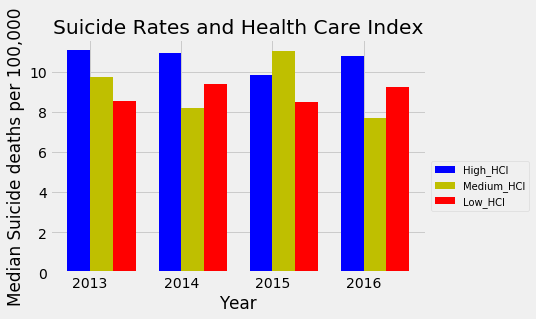

<Figure size 576x288 with 0 Axes>

In [29]:
#plot the graph
years=[2013,2014,2015,2016]
x_axis = np.arange(len(years))
bar_width=0.35

fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

width = 0.25         # the width of the bars
p1 = ax.bar(x_axis, HCI_combined_df[HCI_combined_df['Group1']=='1']['Both sexes (deaths per 100,000)'],color='b', width=width)
p2 = ax.bar(x_axis + width, HCI_combined_df[HCI_combined_df['Group2']=='2']['Both sexes (deaths per 100,000)'],color='y', width=width)
p3 = ax.bar(x_axis + width + width , HCI_combined_df[HCI_combined_df['Group3']=='3']['Both sexes (deaths per 100,000)'], color='r', width=width)

ax.set_title('Suicide Rates and Health Care Index')
ax.set_xticks(x_axis+ width / 2)
ax.set_xticklabels(('2013', '2014', '2015', '2016'))
ax.set_xlabel('Year')
ax.set_ylabel('Median Suicide deaths per 100,000')


ax.legend((p1[0], p2[0],p3[0]), ('High_HCI', 'Medium_HCI','Low_HCI'),fontsize = 10,  bbox_to_anchor=(1.0, 0.5))
plt.style.use('fivethirtyeight')
ax.autoscale_view()

plt.show()

In [30]:
#Stacey ends here


In [31]:
#Stacey's Stats Start
# Take Mean for Each group

HCI_combined_df_Grp1 = HCI_combined_df[HCI_combined_df['Group1']=='1'][['Both sexes (deaths per 100,000)']]
HCI_combined_df_Grp2 = HCI_combined_df[HCI_combined_df['Group2']=='2'][['Both sexes (deaths per 100,000)']]
HCI_combined_df_Grp3 = HCI_combined_df[HCI_combined_df['Group3']=='3'][['Both sexes (deaths per 100,000)']]

sts.f_oneway(HCI_combined_df_Grp1["Both sexes (deaths per 100,000)"], HCI_combined_df_Grp2["Both sexes (deaths per 100,000)"], HCI_combined_df_Grp3["Both sexes (deaths per 100,000)"])

#Stacey's Stats End

F_onewayResult(statistic=3.737262016621456, pvalue=0.06583143917402687)